# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
# Write your code here
# Importing required package
import pandas as pd

# Reading the csv file
imdb = pd.read_csv ('movies_reviews.csv')
df_imdb = imdb.head()
df_imdb

,Review Title,Review Date,Review Description
0,"A scene between an intelligent raccoon, a rabb...",10 May 2023,"Guardians of the Galaxy Volume 3 is chaotic, w..."
1,A Fitting and Heartfelt End to the Trilogy,4 May 2023,Having sat through some phase 4 films that fai...
2,One of the Best MCU Trilogies,8 May 2023,"Up to this point, there has been one trilogy i..."
3,"This is one of the best MCU movies, hands down",7 May 2023,"""There is no God. That's why I stepped in."" I ..."
4,I am groot,3 May 2023,"Firstly Adam warlock's intro was marvelous, wh..."


In [2]:
import re
import unicodedata
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
modified_col = []
for i in df_imdb['Review Description']:
    modified_col.append((re.sub("[^A-Za-z ]","",i)).lower())
df_imdb['Review Description'] = modified_col

# Printing the dataframe records
print(df_imdb)

                                        Review Title  Review Date  \
0  A scene between an intelligent raccoon, a rabb...  10 May 2023   
1         A Fitting and Heartfelt End to the Trilogy   4 May 2023   
2                      One of the Best MCU Trilogies   8 May 2023   
3     This is one of the best MCU movies, hands down   7 May 2023   
4                                         I am groot   3 May 2023   

                                  Review Description  
0  guardians of the galaxy volume  is chaotic wei...  
1  having sat through some phase  films that fail...  
2  up to this point there has been one trilogy in...  
3  there is no god thats why i stepped in i have ...  
4  firstly adam warlocks intro was marvelous whic...  


<ipython-input-3-f42720045f1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imdb['Review Description'] = modified_col


In [4]:
#removing stop words
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# List and remove stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

df_imdb['Review Description']=df_imdb['Review Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df_imdb


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-4-d44c3c2aa697>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imdb['Review Description']=df_imdb['Review Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))


,Review Title,Review Date,Review Description
0,"A scene between an intelligent raccoon, a rabb...",10 May 2023,guardians galaxy volume chaotic weird oftentim...
1,A Fitting and Heartfelt End to the Trilogy,4 May 2023,sat phase films failed inspire guardians feels...
2,One of the Best MCU Trilogies,8 May 2023,point one trilogy mcu excellent start finish t...
3,"This is one of the best MCU movies, hands down",7 May 2023,god thats stepped admit one best lines ever sp...
4,I am groot,3 May 2023,firstly adam warlocks intro marvelous made hat...


In [5]:
description = []
# Iterate over the first 25 rows of the 'Comment' column
for i in range(5):
    description.append(df_imdb['Review Description'][i])

# Concatenate the comments into a single string using join()
str1 = ''.join(description)
str1

'guardians galaxy volume chaotic weird oftentimes ridiculous also full heart emotion great themesi must say best marvel movie since endgame thats necessarily hard though needed surpass way home amazing high moments lazy others marvel desperate need hit theyve finally got ithighlightsevery member crew got time shine rocket definitely one stood though sees friend die wail pain grief made bawl high evolutionary mocks man heavy stuff proceeds rip face two friends shot well thus rockets traumatic pastime revealedchukwudi iwuji fantastic villain certain points downright terrifying really liked line god thats took place convincing villainthe moment starlord screams agony rocket live moment resonated lost many people close cant stand lose anyone elsegamora gets lot character development im glad didnt kiss quill end would felt little cheapdrax mantis nebula adam warlock others also got moments well im surprised nobody died honestone problems movie humor lot time good passable times undercut rea

In [6]:
# Print the list of trigrams
TextBlob(str1).ngrams(3)

[WordList(['guardians', 'galaxy', 'volume']),
 WordList(['galaxy', 'volume', 'chaotic']),
 WordList(['volume', 'chaotic', 'weird']),
 WordList(['chaotic', 'weird', 'oftentimes']),
 WordList(['weird', 'oftentimes', 'ridiculous']),
 WordList(['oftentimes', 'ridiculous', 'also']),
 WordList(['ridiculous', 'also', 'full']),
 WordList(['also', 'full', 'heart']),
 WordList(['full', 'heart', 'emotion']),
 WordList(['heart', 'emotion', 'great']),
 WordList(['emotion', 'great', 'themesi']),
 WordList(['great', 'themesi', 'must']),
 WordList(['themesi', 'must', 'say']),
 WordList(['must', 'say', 'best']),
 WordList(['say', 'best', 'marvel']),
 WordList(['best', 'marvel', 'movie']),
 WordList(['marvel', 'movie', 'since']),
 WordList(['movie', 'since', 'endgame']),
 WordList(['since', 'endgame', 'thats']),
 WordList(['endgame', 'thats', 'necessarily']),
 WordList(['thats', 'necessarily', 'hard']),
 WordList(['necessarily', 'hard', 'though']),
 WordList(['hard', 'though', 'needed']),
 WordList(['th

In [7]:
# Tokenize the string
tokens = nltk.word_tokenize(str1)

# empty list to store trigrams
trigrams = []

# trigrams generation
for i in range(len(tokens) - 2):
    trigrams.append((tokens[i], tokens[i+1], tokens[i+2]))

# Counting the no of frequencytrigrams
trigram_freq = {}
for trigram in trigrams:
    trigram_freq[trigram] = trigram_freq.get(trigram, 0) + 1

# Print the frequency of trigrams
print('The frequency of trigrams:')
for trigram, frequency in trigram_freq.items():
    print(trigram, frequency)

The frequency of trigrams:
('guardians', 'galaxy', 'volume') 2
('galaxy', 'volume', 'chaotic') 1
('volume', 'chaotic', 'weird') 1
('chaotic', 'weird', 'oftentimes') 1
('weird', 'oftentimes', 'ridiculous') 1
('oftentimes', 'ridiculous', 'also') 1
('ridiculous', 'also', 'full') 1
('also', 'full', 'heart') 1
('full', 'heart', 'emotion') 1
('heart', 'emotion', 'great') 1
('emotion', 'great', 'themesi') 1
('great', 'themesi', 'must') 1
('themesi', 'must', 'say') 1
('must', 'say', 'best') 1
('say', 'best', 'marvel') 1
('best', 'marvel', 'movie') 1
('marvel', 'movie', 'since') 1
('movie', 'since', 'endgame') 1
('since', 'endgame', 'thats') 1
('endgame', 'thats', 'necessarily') 1
('thats', 'necessarily', 'hard') 1
('necessarily', 'hard', 'though') 1
('hard', 'though', 'needed') 1
('though', 'needed', 'surpass') 1
('needed', 'surpass', 'way') 1
('surpass', 'way', 'home') 1
('way', 'home', 'amazing') 1
('home', 'amazing', 'high') 1
('amazing', 'high', 'moments') 1
('high', 'moments', 'lazy') 1
(

In [8]:
# Tokenize the string
tokens = nltk.word_tokenize(str1)

# Generate the bigrams
bigrams = list(nltk.bigrams(tokens))

# Calculate frequency of each word and bigram
word_freq = nltk.FreqDist(tokens)
bigram_freq = nltk.FreqDist(bigrams)

# print and Calculate the probabilities for individual
for bigram, frequency in bigram_freq.items():
    # Check if the denominator
    denominator = word_freq[bigram[0]]
    if denominator != 0:
        probability = frequency / denominator
        print(bigram, probability)
    else:
        print(f"Warning: The denominator for {bigram} is zero.")


('guardians', 'galaxy') 0.5454545454545454
('galaxy', 'volume') 0.2857142857142857
('volume', 'chaotic') 0.5
('chaotic', 'weird') 0.3333333333333333
('weird', 'oftentimes') 0.3333333333333333
('oftentimes', 'ridiculous') 1.0
('ridiculous', 'also') 1.0
('also', 'full') 0.3333333333333333
('full', 'heart') 0.5
('heart', 'emotion') 0.5
('emotion', 'great') 1.0
('great', 'themesi') 0.3333333333333333
('themesi', 'must') 1.0
('must', 'say') 1.0
('say', 'best') 0.3333333333333333
('best', 'marvel') 0.25
('marvel', 'movie') 0.3333333333333333
('movie', 'since') 0.07692307692307693
('since', 'endgame') 0.5
('endgame', 'thats') 0.3333333333333333
('thats', 'necessarily') 0.14285714285714285
('necessarily', 'hard') 1.0
('hard', 'though') 1.0
('though', 'needed') 0.14285714285714285
('needed', 'surpass') 1.0
('surpass', 'way') 1.0
('way', 'home') 0.5
('home', 'amazing') 0.5
('amazing', 'high') 1.0
('high', 'moments') 0.2
('moments', 'lazy') 0.3333333333333333
('lazy', 'others') 1.0
('others', 'ma

In [9]:
# importing required libraries, from nltk for NLP
import nltk
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')

# find the parts of speech and filter out the terms which are nouns
pos = nltk.pos_tag(tokens)
pos_nouns = list(filter(lambda x: x[1] == "NN", pos))
pos_nouns

# convert the list into nouns list
list2 = []
for n in pos_nouns:
  list2.append(n[0])
# find unique terms by converting into set
set1 = set(list2)

# create dictionary
dic = {}

# create dictionary containing the noun term & its frequency
for s in set1:
  count = list2.count(s)
  dic[s] = count
# retrieve all the frequency values using dictionary values
count_freq = dic.values()

# calculate the total of frequencies
total = 0
for c in count_freq:
  total = total + c

# calculate the answer by using the formula fomular frequency (noun phrase) / max frequency (noun phrase)
for d in dic:
  dic[d] = dic[d]/total

# print the answer using dataframe
import pandas as pd
df = pd.DataFrame(dic, index = ['relative probability'])
print(df)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


                        nebula     piece   emotion  spiderman      hell  \
relative probability  0.008969  0.004484  0.004484   0.004484  0.004484   

                          care    moment     phase      path     story  ...  \
relative probability  0.004484  0.008969  0.004484  0.004484  0.017937  ...   

                      storyarcswhile  criticism  technology      adam  \
relative probability        0.004484   0.004484    0.004484  0.008969   

                          move     space   scenesi       sad        dc  \
relative probability  0.004484  0.004484  0.004484  0.004484  0.004484   

                      backstory  
relative probability   0.004484  

[1 rows x 160 columns]


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [10]:
# Write your code here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('movies_reviews.csv')

# Extract the 'Review Description' column
document = df['Review Description'].astype(str)

# Create a TF-IDF vectorizer and Fit and transform the documents
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(document)


feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for the TF-IDF matrix
df_tfidf = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)
print(df_tfidf)

           10        30      able  absolutely       act    acting    action  \
0     0.08459  0.000000  0.000000         0.0  0.000000  0.000000  0.000000   
1     0.00000  0.000000  0.000000         0.0  0.000000  0.000000  0.071439   
2     0.00000  0.094764  0.000000         0.0  0.094764  0.083874  0.000000   
3     0.00000  0.000000  0.102615         0.0  0.000000  0.000000  0.000000   
4     0.00000  0.000000  0.000000         0.0  0.099114  0.000000  0.051204   
...       ...       ...       ...         ...       ...       ...       ...   
9995  0.00000  0.000000  0.000000         0.0  0.000000  0.000000  0.100039   
9996  0.00000  0.000000  0.000000         0.0  0.000000  0.000000  0.032109   
9997  0.00000  0.000000  0.000000         0.0  0.000000  0.000000  0.066465   
9998  0.16924  0.000000  0.000000         0.0  0.000000  0.062140  0.000000   
9999  0.00000  0.000000  0.000000         0.0  0.000000  0.000000  0.000000   

      actor  actors  actually  ...  wrenching    wr

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample DataFrame
df = pd.read_csv('movies_reviews.csv')
document = df['Review Description'].astype(str)

query = "Gale has written a best-seller which has been"
documents = pd.concat([document, pd.Series([query])], ignore_index=True)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Calculate cosine similarity between the query and documents
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

# Get the similarity scores and sort the documents based on similarity
similarity_scores = cosine_similarities[0]
ranked_documents = df.assign(Similarity=similarity_scores).sort_values(by='Similarity', ascending=False)

# Display the ranked documents
print(ranked_documents[['Review Description', 'Similarity']])

                                     Review Description  Similarity
2688  I've talked about this before, how expectation...     0.14379
3738  I've talked about this before, how expectation...     0.14379
5613  I've talked about this before, how expectation...     0.14379
9088  I've talked about this before, how expectation...     0.14379
7913  I've talked about this before, how expectation...     0.14379
...                                                 ...         ...
6161  The most unlikely hit of Marvel's string of hi...     0.00000
6160  This is a fun and exciting space adventure tha...     0.00000
2035  This is a fun and exciting space adventure tha...     0.00000
2036  The most unlikely hit of Marvel's string of hi...     0.00000
9999  The MCU and Disney as a whole have had a large...     0.00000

[10000 rows x 2 columns]


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [12]:
# Write your code here
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset
df = pd.read_csv('movies_reviews.csv')

# Extract the 'Review Description' column
documents = df['Review Description'].astype(str)

from gensim.models import Word2Vec

# Assuming 'documents' is a list of strings
tokenized_docs = [doc.split() for doc in documents]

# Assuming 'df' is your DataFrame containing the column "Review Description"
list_of_reviews = []
for i in df.index:
    review = str(df["Review Description"][i]).split()
    list_of_reviews.append(review)

# Training Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_docs, vector_size=300, window=5, min_count=1, workers=4)

# Extracting vocabulary words
vocab_words = list(word2vec_model.wv.index_to_key)

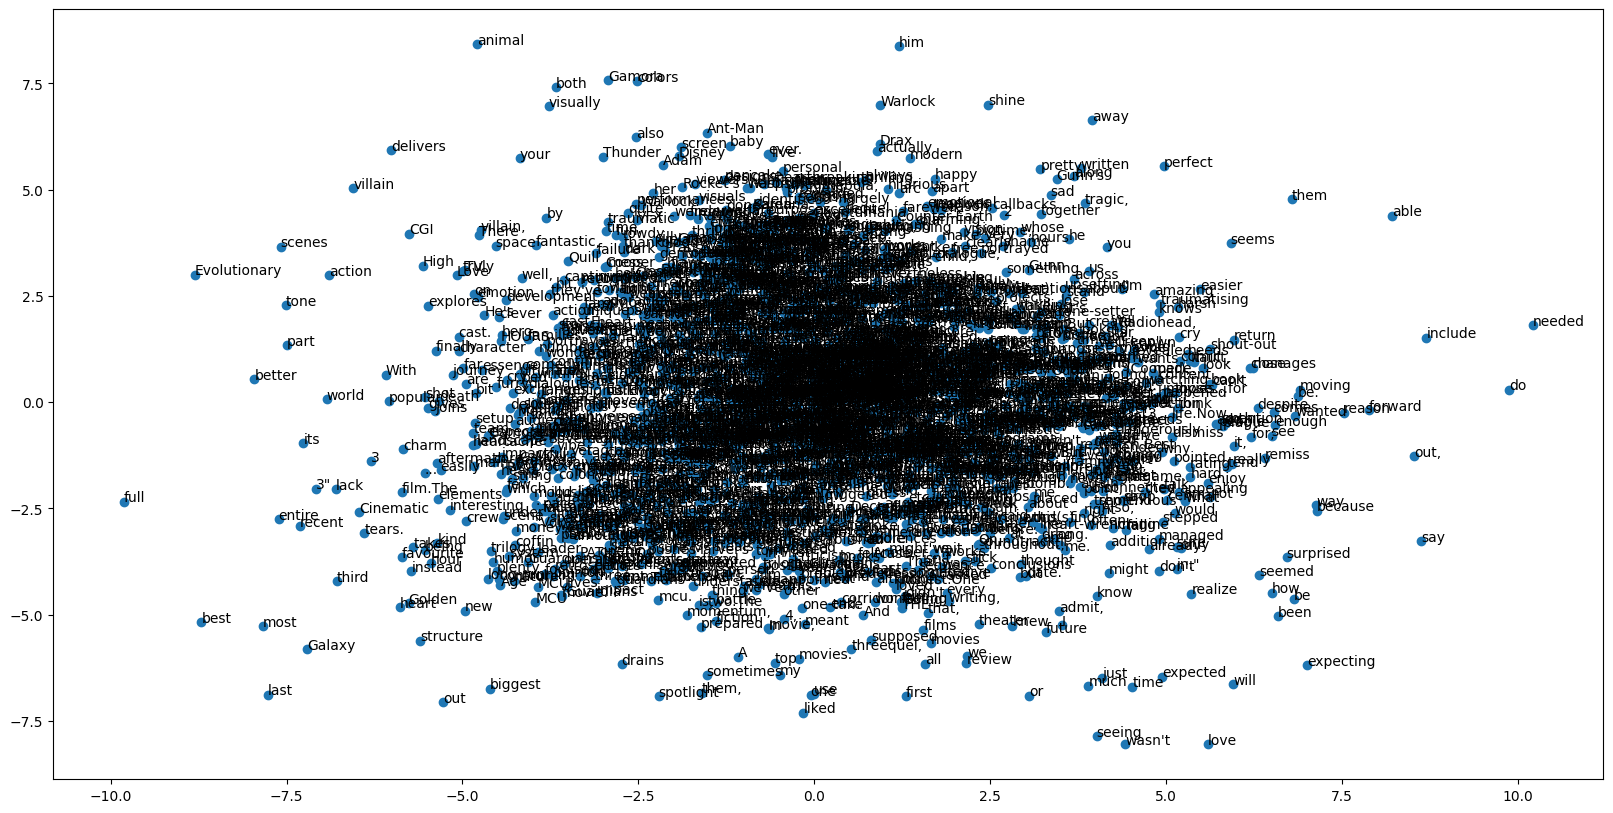

In [13]:
from sklearn.decomposition import PCA

# Assuming 'word2vec_model' is your trained Word2Vec model
embedding_matrix = word2vec_model.wv.vectors

# PCA dimensionality reduction
pca = PCA(n_components=2)
embedding_pca_result = pca.fit_transform(embedding_matrix)

# create a scatter plot of the projection
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.scatter(embedding_pca_result[:, 0], embedding_pca_result[:, 1])
words = list(word2vec_model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(embedding_pca_result[i, 0], embedding_pca_result[i, 1]))
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [14]:
# The GitHub link of your final csv file


# Link:



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [15]:
# Type your answer